Confusion Matrix:
 [[150   8]
 [ 10 132]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94       158
           1       0.94      0.93      0.94       142

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



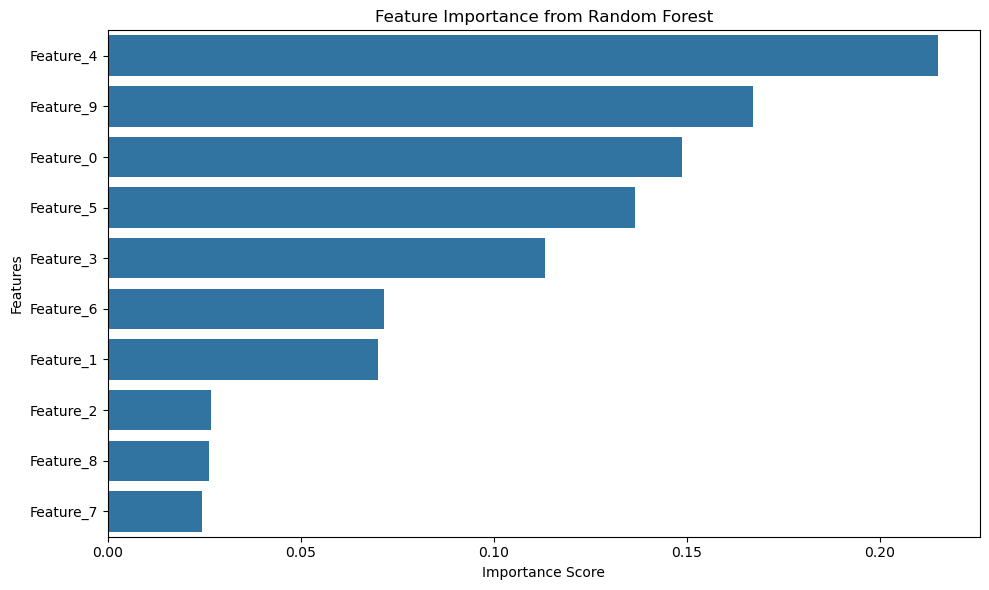

In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generating a synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5,
                           n_redundant=2, n_classes=2, random_state=42)

# Converting to DataFrame for easier manipulation
feature_names = [f"Feature_{i}" for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=feature_names)
df['target_variable'] = y

# Define features (X) and target (y)
X = df.drop('target_variable', axis=1)
y = df['target_variable']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Output performance
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Feature Importance
importances = rf.feature_importances_
forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# Plotting feature importances
plt.figure(figsize=(10,6))
sns.barplot(x=forest_importances, y=forest_importances.index)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()
